In [10]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [20]:
# get data from wordcount.json

with open("wordcount.json", "r") as f:
    raw_data = json.loads(f.read())
raw_data = [["2023-04-04",0]] + raw_data
date = lambda string: datetime.strptime(string, "%Y-%m-%d")

dates = np.array([date(s) for s,_ in raw_data])
wordcounts = np.array([c for _,c in raw_data])


internal_deadline_date = date("2023-04-24")
absolute_deadline_date = date("2023-05-02")
first_date = dates[1]
start_date = min(dates)
end_date = max(dates)

rd = lambda d: datetime.toordinal(d) - datetime.toordinal(start_date)

internal_deadline = rd(internal_deadline_date)
absolute_deadline = rd(absolute_deadline_date)
gihan_returns = rd(date("2023-04-19"))
first = rd(first_date)
start = rd(start_date)
end = rd(end_date)

today = rd(datetime.now())

[    0 10255 11671 12669 14425 15313 16461]


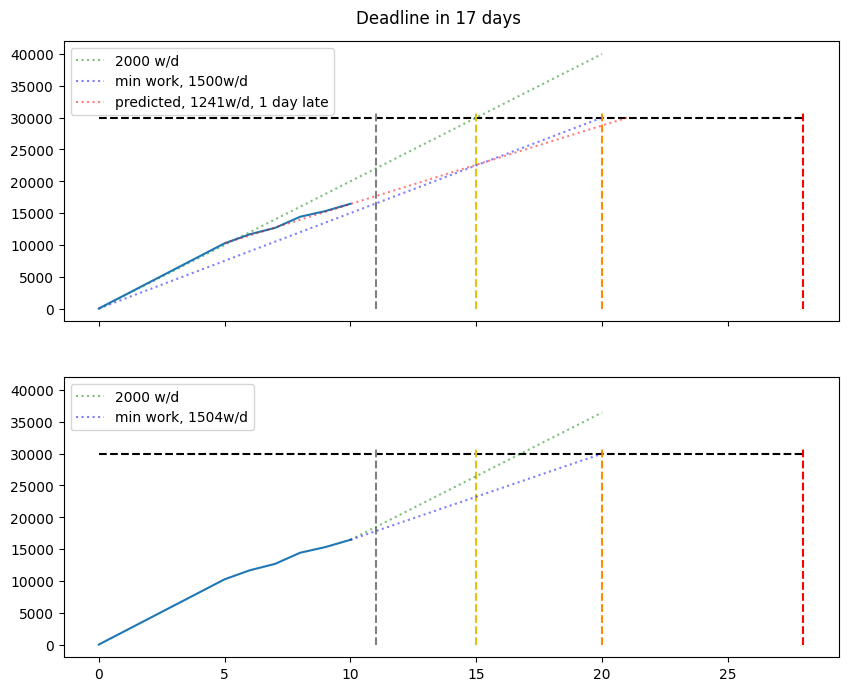

In [34]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True, sharey=True)

X = pd.Series(dates).map(rd)


ax.plot([start, absolute_deadline], [30000, 30000], "--", color="black")
ax.plot([today, today], [0, 31000], "--", color="grey")
ax.plot([internal_deadline, internal_deadline], [0, 31000], linestyle="--", color="darkorange")
ax.plot([absolute_deadline, absolute_deadline], [0, 31000], linestyle="--", color="red")
ax.plot([gihan_returns, gihan_returns], [0, 31000], linestyle="--", color="#e6c210")
ax2.plot([start, absolute_deadline], [30000, 30000], "--", color="black")
ax2.plot([today, today], [0, 31000], "--", color="grey")
ax2.plot([internal_deadline, internal_deadline], [0, 31000], linestyle="--", color="darkorange")
ax2.plot([absolute_deadline, absolute_deadline], [0, 31000], linestyle="--", color="red")
ax2.plot([gihan_returns, gihan_returns], [0, 31000], linestyle="--", color="#e6c210")

planned_rate = 2000  # words per day

rel_plan = np.linspace(start=0, stop=internal_deadline, num=2)
word_plan = rel_plan * 2000

ax.plot(rel_plan, word_plan, linestyle="dotted", color="green", alpha=0.5, label="2000 w/d")
ax.plot([0, internal_deadline], [0, 30000], linestyle="dotted", color="blue", alpha=0.5, label=f"min work, {30000/internal_deadline:.0f}w/d")

ax.plot(X, wordcounts)
ax2.plot(X, wordcounts)


rel_plan = np.linspace(start=end, stop=internal_deadline, num=2)
word_plan = (rel_plan - end) * 2000 + wordcounts[-1]
ax2.plot(rel_plan, word_plan, linestyle="dotted", color="green", alpha=0.5, label="2000 w/d")
ax2.plot([end, internal_deadline], [wordcounts[-1], 30000], linestyle="dotted", color="blue", alpha=0.5, label=f"min work, {(30000-wordcounts[-1])/(internal_deadline-today):.0f}w/d")

ax2.legend(loc="upper left")

fig.set_facecolor("white")

 
words_per_day = wordcounts[1:] - np.array([wordcounts[1]]+list(wordcounts[1:-1]))
words_per_day

mean_words = np.mean(words_per_day[1:])
predicted_completion = int(np.round((30000-wordcounts[1] - first)/mean_words + first))

ax.plot([first, predicted_completion], [wordcounts[1], 30000], linestyle="dotted", color="red", alpha=0.5, label=f"predicted, {mean_words:.0f}w/d, {predicted_completion - internal_deadline} day{'s' if predicted_completion-internal_deadline!=1 else ''} late")

ax.legend(loc="upper left")

fig.suptitle(f"Deadline in {absolute_deadline - today} days",y=0.92)
print(wordcounts)